# Dog Classifier
## Image Preprocessing

In [79]:
# Imports
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import yaml
from pathlib import Path

In [80]:
# Config file
config = yaml.safe_load(open("image_preprocessing.yml", encoding="utf-8"))

### Read Images

In [81]:
raw_images_path = str(Path().resolve()) + config["input"]["folder"]

image_paths = list()
for root, dirs, files in os.walk(raw_images_path):
    for name in files:
        if name.endswith(config["input"]["extension"]):
            image_paths.append(os.path.join(root, name))

display("Number of raw images: {0}".format(len(image_paths)))

'Number of raw images: 450'

### Preprocessing
Applies resizing and noise removal to the images

In [82]:
def remove_noise(images):
    """ Return 'images' without noise """
    no_noise = []
    for i in range(len(images)):
        blur = cv2.GaussianBlur(images[i], (5, 5), 0)
        no_noise.append(blur)
        
    return no_noise
    
    
def resize(images, height=220, width=220):
    """ Return 'images' resized """
    dim = (width, height)
    resized_images = []
    for i in range(len(images)):
        res = cv2.resize(images[i], dim, interpolation=cv2.INTER_LINEAR)
        resized_images.append(res)
        
    return resized_images


def processing(paths, height=220, width=220):
    """ Preprocess images in 'paths' """
    original_images = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in paths]

    images = resize(original_images, height, width)
    images = remove_noise(images)
    
    return original_images, images
    
original_images, preprocessed_images = processing(image_paths, config["preprocessing"]["height"], 
                                                  config["preprocessing"]["width"])

Display one image to compare the *raw* and *preprocessed* images

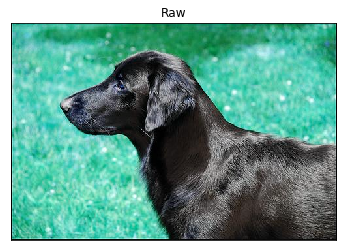

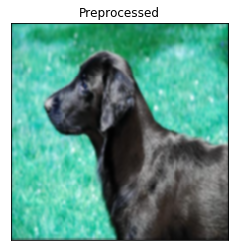

In [83]:
def display_one(a, title=""):
    """ Displays one image """
    plt.imshow(a), plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()
    

display_one(original_images[0], title="Raw")
display_one(preprocessed_images[0], title="Preprocessed")

### Save preprocessed images

In [84]:
preprocessed_images_path = str(Path().resolve()) + config["output"]["folder"]

if not os.path.exists(preprocessed_images_path):
    os.makedirs(preprocessed_images_path)

for path, img in zip(image_paths, preprocessed_images):    
    filename = Path(path).parts[-1].replace(config["input"]["extension"], config["output"]["extension"])
    folder = Path(path).parts[-2]
    
    
    if not os.path.exists(os.path.join(preprocessed_images_path, folder)):
        os.makedirs(os.path.join(preprocessed_images_path, folder))
        
    output_path = os.path.join(preprocessed_images_path, folder, filename)
    result = cv2.imwrite(output_path, img)
    if result is False:
        print("Error in {0}".format(output_path))